# Benchmark experiment - Juliana Sanchez

In [51]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


In [52]:
# Read data
data = pd.read_csv('Dataset 1_Bank Marketing/bank_mkt_train.csv')
#Split train and test
train, test = train_test_split(data, test_size=0.2, random_state=42)
data.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [53]:
#Summary of the data - 1
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 5894 to 15795
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       16000 non-null  int64  
 1   age             15842 non-null  float64
 2   job             15860 non-null  object 
 3   marital         15841 non-null  object 
 4   education       15865 non-null  object 
 5   default         15825 non-null  object 
 6   housing         15837 non-null  object 
 7   loan            15827 non-null  object 
 8   contact         15829 non-null  object 
 9   month           15838 non-null  object 
 10  day_of_week     15852 non-null  object 
 11  campaign        15844 non-null  float64
 12  pdays           15846 non-null  float64
 13  previous        15841 non-null  float64
 14  poutcome        15861 non-null  object 
 15  emp.var.rate    15863 non-null  float64
 16  cons.price.idx  15851 non-null  float64
 17  cons.conf.idx   15841 non-nu

In [54]:
#numeric variables
num_var = ['age','pdays','previous',"emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",'campaign']
#Categorical variables
cat_var = ["job",'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [55]:
#Summary of the data - Numeric variables
train[num_var].describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign
count,15842.000000,15846.000000,15841.000000,15863.000000,15851.000000,15841.000000,15842.000000,15852.000000,15844.000000
mean,40.084207,961.897892,0.171012,0.095127,93.578654,-40.466189,3.639844,5167.612528,2.589371
std,10.423776,188.341702,0.500488,1.570787,0.580341,4.607290,1.727993,72.093729,2.831599
min,17.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000
25%,32.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000
50%,38.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,2.000000
75%,47.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000
max,98.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.000000


In [56]:
#Summary of the data - Categorical variables
for col in cat_var:
    summary = train[col].value_counts()
    print(pd.DataFrame(summary))

                job
admin.         3985
blue-collar    3556
technician     2595
services       1549
management     1139
retired         674
entrepreneur    586
self-employed   557
housemaid       431
unemployed      374
student         304
unknown         110
          marital
married      9559
single       4443
divorced     1809
unknown        30
                     education
university.degree         4779
high.school               3566
basic.9y                  2340
professional.course       2009
basic.4y                  1660
basic.6y                   887
unknown                    617
illiterate                   7
         default
no         12563
unknown     3260
yes            2
         housing
yes         8388
no          7101
unknown      348
          loan
no       13053
yes       2425
unknown    349
           contact
cellular      9980
telephone     5849
     month
may   5292
jul   2813
aug   2339
jun   2071
nov   1619
apr    954
oct    269
sep    225
mar    185
dec     

In [57]:
#Target variable
train[['subscribe']].value_counts()

subscribe
0            14213
1             1787
dtype: int64

## 1.Data processing

In [58]:
#Checking missing values
print('Train - # NA of num vars:', train[num_var].isna().sum().sum())
print('Train - # NA of cat vars:', train[cat_var].isna().sum().sum())
print('Test - # NA of num vars:', test[num_var].isna().sum().sum())
print('Test - # NA of cat vars:', test[cat_var].isna().sum().sum())

Train - # NA of num vars: 1378
Train - # NA of cat vars: 1565
Test - # NA of num vars: 352
Test - # NA of cat vars: 369


In [59]:
#Impute missing values for numeric variables
for col in num_var:
    mean = train[col].mean()
    train[col+"_na"]=0
    train.loc[train[col].isna() == True,col+"_na"]=1
    train[col] = train[col].fillna(mean)
    
    test[col+"_na"]=0
    test.loc[test[col].isna() == True,col+"_na"]=1
    test[col] = test[col].fillna(mean)


In [60]:
#Impute missing values for categoric variables
train[cat_var] = train[cat_var].fillna('Missing')
test[cat_var] = test[cat_var].fillna('Missing')

## 2.Feature engineering

In [61]:
#Dummy variable to check contact
train['contacted'] = 0
train.loc[train["pdays"]<900,"contacted"]=1
train = train.drop(['pdays'],axis=1)

test['contacted'] = 0
test.loc[test["pdays"]<900,"contacted"]=1
test = test.drop(['pdays'],axis=1)

num_var = num_var.remove("pdays")


In [62]:
#Age categories per quartiles
train["buckets_ages"] = pd.qcut(train['age'], q=4)
cat_var = cat_var + ['buckets_ages']

test['buckets_ages'] = "(16.999, 32.0]"
test.loc[test['age']>47,"buckets_ages"]="(47.0, 98.0]"
test.loc[(test['age']<47) & (test['age']>38),"buckets_ages"] = "(38.0, 47.0]"
test.loc[(test['age']<38) & (test['age']>33),"buckets_ages"] = "(32.0, 38.0]"


In [63]:
#Normalizing variables for KNN
vars_norm = ["campaign","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
enable_normalize = True  # Normalize the data to the same range [0, 1]
if enable_normalize:
    for var in vars_norm:
        # Build the normalizer on train
        scaler = MinMaxScaler().fit(train[[var]])
        # Apply on train, test
        train[var] = scaler.transform(train[[var]])
        test[var] = scaler.transform(test[[var]])

In [64]:
#Creating dummy variables
train = pd.get_dummies(train, columns=cat_var, drop_first=False)
test = pd.get_dummies(test, columns=cat_var, drop_first=False)

In [65]:
train = train.drop(['job_Missing','marital_Missing', 'education_Missing','default_Missing', 'housing_Missing','loan_Missing',
       'contact_Missing', 'month_Missing', 'day_of_week_fri','poutcome_failure','buckets_ages_(16.999, 32.0]'],axis=1)

test = test.drop(['job_Missing','marital_Missing', 'education_Missing','default_Missing', 'housing_Missing','loan_Missing',
       'contact_Missing', 'month_Missing', 'day_of_week_fri','poutcome_failure','buckets_ages_(16.999, 32.0]'],axis=1)

In [66]:
#Final variables
id_var = ['customer_id']
target_var = ['subscribe']
predictors = [v for v in train.columns if v not in id_var + target_var]

target_train = train[["subscribe"]]
target_test= test[["subscribe"]]

## 3. Models benchmark

### A. Logistic regression

In [67]:
#Fisher score for feature selection
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [68]:
# Calculate Fisher Score for all variables
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head(7)

,predictor,fisherscore
8,nr.employed,0.748816
7,euribor3m,0.714965
4,emp.var.rate,0.677628
18,contacted,0.473696
71,poutcome_success,0.454186
3,previous,0.398336
70,poutcome_nonexistent,0.384037


In [69]:
num_var = ['age','previous',"emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",'campaign','job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_Missing', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_Missing',
       'poutcome_nonexistent', 'poutcome_success', 'buckets_ages_(32.0, 38.0]',
       'buckets_ages_(38.0, 47.0]', 'buckets_ages_(47.0, 98.0]']


In [70]:
# Pearson's correlation for numerical variables
corr = train[num_var + ['subscribe']].corr(method='pearson')
corr = corr[['subscribe'][0]][:-1].dropna().sort_values(ascending=False)
print("Top 5 vars [+] correlated with target_var :"); print(corr[corr > 0][:5])
print("Top 5 vars [-] correlated with target_var :"); print(corr[corr < 0][-5:])

Top 5 vars [+] correlated with target_var :
poutcome_success    0.328997
previous            0.245107
contact_cellular    0.141456
month_oct           0.137289
month_mar           0.132408
Name: subscribe, dtype: float64
Top 5 vars [-] correlated with target_var :
contact_telephone      -0.143491
poutcome_nonexistent   -0.198733
emp.var.rate           -0.300462
euribor3m              -0.311253
nr.employed            -0.357708
Name: subscribe, dtype: float64


In [71]:
#selected variables
#Fisher score
logit_vars = ['nr.employed','euribor3m','emp.var.rate','contacted','poutcome_success','previous','poutcome_nonexistent']
#Correlation
corr_vars = ['nr.employed','euribor3m','emp.var.rate','contacted','poutcome_nonexistent','contact_telephone','poutcome_success','previous','contact_cellular']

In [72]:
#Model
logisticRegr = LogisticRegression()
logisticRegr.fit(train[logit_vars], target_train.values.ravel())
#Prediction in test set
logit_pred = logisticRegr.predict(test[logit_vars])

In [73]:
#Performance
acc_logit = logisticRegr.score(test[logit_vars], target_test.values.ravel())
print("Accuracy: ",acc_logit)

logit_pred_proba = logisticRegr.predict_proba(test[logit_vars])[::,1]

#calculate AUC of model
auc_logit = metrics.roc_auc_score(target_test.values.ravel(), logit_pred_proba)

#print AUC score
print("AUC: ",auc_logit)

Accuracy:  0.891
AUC:  0.7555075851596951


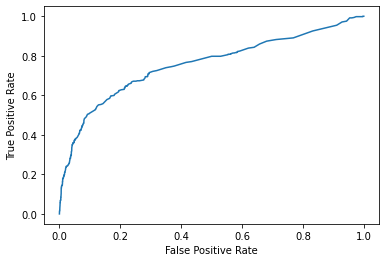

In [74]:
fpr, tpr, _ = metrics.roc_curve(target_test.values.ravel(),  logit_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
#Cross validation
#merge train and test datasets for crossvalidation
base_table = train.append(test).reset_index()
target_tot = base_table['subscribe']
indep_vars = base_table[logit_vars]
cv_logit = cross_val_score(logisticRegr, indep_vars, target_tot.values.ravel(), cv=5)
cv_logit

array([0.9015, 0.903 , 0.8965, 0.9   , 0.8975])

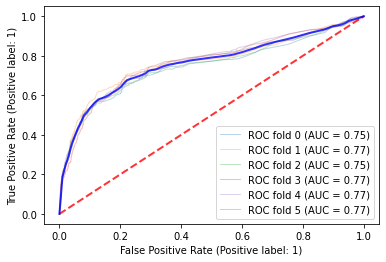

In [76]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)
fig, ax = plt.subplots()
for i, (train_f, test_f) in enumerate(cv.split(indep_vars, target_tot)):
    logisticRegr.fit(indep_vars.iloc[train_f], target_tot.iloc[train_f])
    viz = RocCurveDisplay.from_estimator(
        logisticRegr,
        indep_vars.iloc[test_f],
        target_tot.iloc[test_f],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

In [77]:
#Excercise to check betas and p values
import statsmodels.api as sd
sd_model = sd.Logit( target_train.values.ravel(), train[logit_vars]).fit(disp=0)
print(sd_model.pvalues)
sd_model.summary()


nr.employed             4.474087e-70
euribor3m               1.166637e-05
emp.var.rate            9.569171e-09
contacted               3.268629e-06
poutcome_success        1.183633e-02
previous                6.871153e-02
poutcome_nonexistent    1.448323e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.1872
Time:                        22:11:06   Log-Likelihood:                -4552.2
converged:                       True   LL-Null:                       -5600.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
nr.employed             -3.2548      0.184    -17.696      0.000      -3.615      -2.894
euribor3m                1.0163      0.232      4.384      0.000       0.562       1.471
emp.var.rate            -1.3304      0.232     -5.738      0.000      -1.785      -0.876
contacted                1.3262      0.285      4.653      0.000       0.768       1.885
poutcome_success         0.7000      0.278      2.517      0.012       0.155       1.245
previous                -0.6540      0.359     -1.820      0.069      -1.358       0.050
poutcome_nonexistent     0.3119      0.082      3.800      0.000       0.151       0.473
========================================================================================
"""

### B. LDA

In [78]:
predictors = [v for v in train.columns if v not in id_var + target_var+["default_yes"]]
#Model
lda = LDA()
lda.fit(train[predictors], target_train.values.ravel())
#Prediction in test set
lda_pred = lda.predict(test[predictors])

In [79]:
lda.explained_variance_ratio_

array([1.])

In [80]:
#Performance
acc_lda = lda.score(test[predictors], target_test.values.ravel())
print("Accuracy: ",acc_lda)

lda_pred_proba = lda.predict_proba(test[predictors])[::,1]

#calculate AUC of model
auc_lda = metrics.roc_auc_score(target_test.values.ravel(), lda_pred_proba)

#print AUC score
print("AUC: ",auc_lda)

Accuracy:  0.87925
AUC:  0.7571467858855386


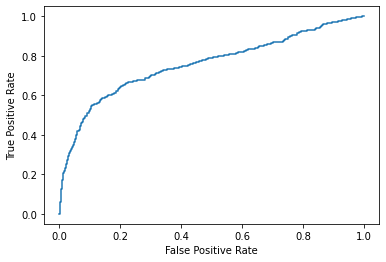

In [81]:
fpr_lda, tpr_lda, _ = metrics.roc_curve(target_test.values.ravel(),  lda_pred_proba)

#create ROC curve
plt.plot(fpr_lda,tpr_lda)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
#Cross validation
#merge train and test datasets for crossvalidation
indep_vars = base_table[predictors]
cv_lda = cross_val_score(lda, indep_vars, target_tot.values.ravel(), cv=5)
cv_lda

array([0.8925 , 0.89375, 0.8835 , 0.89   , 0.88425])

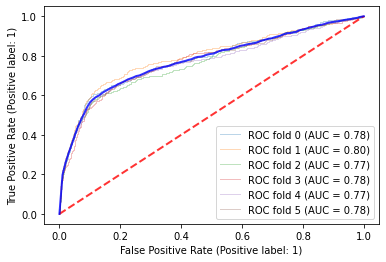

In [83]:
tprs = []
aucs = []
indep_vars = base_table[predictors]
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)
fig, ax = plt.subplots()
for i, (train_f, test_f) in enumerate(cv.split(indep_vars, target_tot)):
    lda.fit(indep_vars.iloc[train_f], target_tot.iloc[train_f])
    viz = RocCurveDisplay.from_estimator(
        lda,
        indep_vars.iloc[test_f],
        target_tot.iloc[test_f],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

### KNN Classifier

In [84]:
#using corr_vars
#Model
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(train[corr_vars].values, target_train.values.ravel())
#Prediction in test set
knn_pred = KNN.predict(test[corr_vars].values)


In [85]:
#Performance
acc_knn = KNN.score(test[corr_vars].values, target_test.values.ravel())
print("Accuracy: ",acc_knn)

knn_pred_proba = KNN.predict_proba(test[corr_vars].values)[::,1]

#calculate AUC of model
auc_knn = metrics.roc_auc_score(target_test.values.ravel(), knn_pred_proba)

#print AUC score
print("AUC: ",auc_knn)

Accuracy:  0.889
AUC:  0.7482538501678277


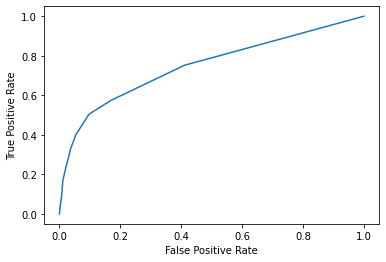

In [86]:
fpr_knn, tpr_knn, _ = metrics.roc_curve(target_test.values.ravel(),  knn_pred_proba)

#create ROC curve
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
#Cross validation
#merge train and test datasets for crossvalidation
indep_vars = base_table[corr_vars]
cv_knn = cross_val_score(KNN, indep_vars.values, target_tot.values.ravel(), cv=5)
cv_knn

array([0.89525, 0.9005 , 0.8945 , 0.89875, 0.89425])

In [88]:
import warnings
warnings.filterwarnings("ignore")

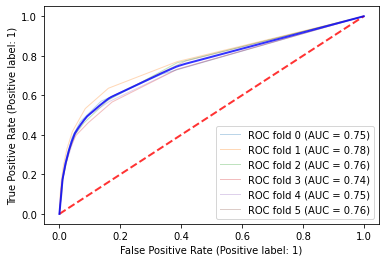

In [89]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)
fig, ax = plt.subplots()
for i, (train_f, test_f) in enumerate(cv.split(indep_vars.values, target_tot.values)):
    KNN.fit(indep_vars.iloc[train_f], target_tot.iloc[train_f])
    viz = RocCurveDisplay.from_estimator(
        KNN,
        indep_vars.iloc[test_f].values,
        target_tot.iloc[test_f],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

### Random forest

In [90]:
predictors = [v for v in train.columns if v not in id_var + target_var+["default_yes"]]
#Model
rf =  RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(train[predictors], target_train.values.ravel())
#Prediction in test set
rf_pred = rf.predict(test[predictors])


In [91]:
#Performance
acc_rf = rf.score(test[predictors], target_test.values.ravel())
print("Accuracy: ",acc_rf)

rf_pred_proba = rf.predict_proba(test[predictors])[::,1]

#calculate AUC of model
auc_rf = metrics.roc_auc_score(target_test.values.ravel(), rf_pred_proba)

#print AUC score
print("AUC: ",auc_rf)

Accuracy:  0.88325
AUC:  0.7632857821152887


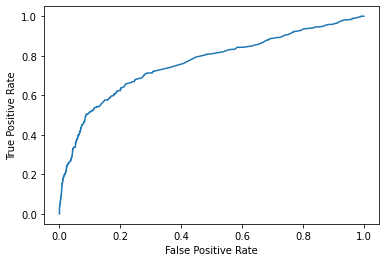

In [92]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(target_test.values.ravel(),  rf_pred_proba)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
#Checking feature importance
feature_imp_rf = pd.Series(rf.feature_importances_,index=predictors).sort_values(ascending=False)
feature_imp_rf.head(10)

nr.employed             0.172447
contacted               0.157440
euribor3m               0.125909
poutcome_success        0.110840
emp.var.rate            0.087674
cons.conf.idx           0.081895
cons.price.idx          0.067843
previous                0.046156
poutcome_nonexistent    0.030244
age                     0.022101
dtype: float64

In [94]:
rf_variables = ['nr.employed','contacted','euribor3m','poutcome_success','emp.var.rate','cons.conf.idx','cons.price.idx',
                'previous','poutcome_nonexistent','age']

In [95]:
#Model after feature selection
rf =  RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(train[rf_variables], target_train.values.ravel())
#Prediction in test set
rf_pred = rf.predict(test[rf_variables])

#Performance
acc_rf = rf.score(test[rf_variables], target_test.values.ravel())
print("Accuracy: ",acc_rf)

rf_pred_proba = rf.predict_proba(test[rf_variables])[::,1]

#calculate AUC of model
auc_rf = metrics.roc_auc_score(target_test.values.ravel(), rf_pred_proba)

#print AUC score
print("AUC: ",auc_rf)

Accuracy:  0.88975
AUC:  0.7568191807933506


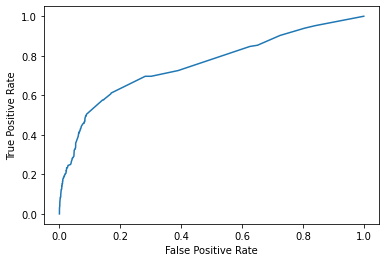

In [96]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(target_test.values.ravel(),  rf_pred_proba)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
#Cross validation
#merge train and test datasets for crossvalidation
indep_vars = base_table[rf_variables]
cv_rf = cross_val_score(KNN, indep_vars, target_tot.values.ravel(), cv=5)
cv_rf

array([0.89625, 0.895  , 0.891  , 0.89825, 0.895  ])

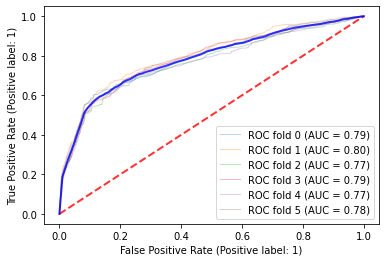

In [98]:
tprs = []
aucs = []
indep_vars = base_table[predictors]
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)
fig, ax = plt.subplots()
for i, (train_f, test_f) in enumerate(cv.split(indep_vars, target_tot)):
    rf.fit(indep_vars.iloc[train_f], target_tot.iloc[train_f])
    viz = RocCurveDisplay.from_estimator(
        rf,
        indep_vars.iloc[test_f],
        target_tot.iloc[test_f],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

### Support vector machine

In [105]:
#Fisher score
fisher_vars = ['nr.employed','euribor3m','emp.var.rate','contacted','poutcome_success','previous','poutcome_nonexistent']

#Model
svc_l =  SVC(kernel='linear',gamma='auto',C =0.5, probability=True)
svc_l.fit(train[fisher_vars], target_train.values.ravel())
#Prediction in test set
svcl_pred = svc_l.predict(test[fisher_vars])

In [106]:
#Performance
acc_svcl = svc_l.score(test[fisher_vars], target_test.values.ravel())
print("Accuracy: ",acc_svcl)

svcl_pred_proba = svc_l.predict_proba(test[fisher_vars])[::,1]

#calculate AUC of model
auc_svcl = metrics.roc_auc_score(target_test.values.ravel(), svcl_pred_proba)

#print AUC score
print("AUC: ",auc_svcl)

Accuracy:  0.888
AUC:  0.702742304365404


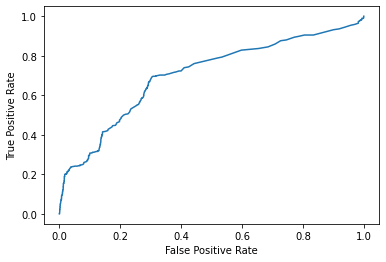

In [107]:
fpr_svcl, tpr_svcl, _ = metrics.roc_curve(target_test.values.ravel(),  svcl_pred_proba)

#create ROC curve
plt.plot(fpr_svcl,tpr_svcl)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
#Cross validation
#merge train and test datasets for crossvalidation
indep_vars = base_table[rf_variables]
cv_rf = cross_val_score(KNN, indep_vars, target_tot.values.ravel(), cv=5)
cv_rf

array([0.89625, 0.895  , 0.891  , 0.89825, 0.895  ])

In [ ]:
tprs = []
aucs = []
indep_vars = base_table[predictors]
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)
fig, ax = plt.subplots()
for i, (train_f, test_f) in enumerate(cv.split(indep_vars, target_tot)):
    svc_l.fit(indep_vars.iloc[train_f], target_tot.iloc[train_f])
    viz = RocCurveDisplay.from_estimator(
        svc_l,
        indep_vars.iloc[test_f],
        target_tot.iloc[test_f],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)